## Experimento 3. 
## Predicción de realizar un primer viaje migratorio hacia Estados Unidos

Selección y limpieza de datos a partir de la tabla <b>PERS</b>.

<b>PERS</b> es un archivo a nivel persona que provee información demográfica general e información sobre migración doméstica, a Estados Unidos, y a Canadá.

En este experimento se pretende obtener la probabilidad de realizar un primer viaje migratorio a Estados Unidos considerando la información contenida en el archivo <b>PERS</b>, calculando la probabilidad de realizar un primer viaje migratorio a partir del atributo <b>USYR1</b>, tomando el valor '8888' como <b>"no realizó un primer viaje migratorio"</b> y valores distintos a '8888' y '9999' como <b>"realizó un viaje migratorio"</b>.

Así, la etiqueta de clase puede tomar dos valores posibles:<br>
>1: Sí (Realizó primer viaje migratorio)<br>0: No (No realizó primer viaje migratorio)<br>

Para todos los clasificadores utilizados, se tomará la clase 1 (Realizó primer viaje migratorio) como clase **Positive**.

Se considera el cálculo de la probabilidad de realizar el primer viaje migratorio como el valor a obtener por los clasificadores utilizados, i.e. $P(\text{class = 1 | x})$ que se puede leer como la probabilidad de que la persona realice su primer viaje migratorio dadas las variables en el dataset.

Pata este experimento, se dividirá entre la clasificación entre hombres y mujeres, documentados e indocumentados siguiendo los resultados publicados por el MMP en: https://mmp.opr.princeton.edu/results/009firsttrippers-es.aspx

<br>

---

Bibliotecas utilizadas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

Rutas de acceso y almacenamiento de los archivos generados

In [2]:
#Ruta para leer el archivo a procesar
path_to_data = os.path.join('../'*3, 'Bases de datos', 'Princeton', 'Mexican Migration Project (MMP)', 'CSV', 'core_files')

#Ruta para almacenar el dataset procesado
path_to_store = os.path.join('..', 'datasets','regreso_ultimo_viaje')

Tipos de dato para cada atributo en las tablas

In [3]:
dtypes = {'country': 'category', 'commun': 'category', 'surveypl': 'category', 'surveyyr': 'category', 'hhnum': 'category', 'persnum': 'category', 'inform': 'category', 
          'hhmemshp': 'category', 'weight': 'float64', 'sex': 'category', 'relhead': 'category', 'yrborn': 'category', 'yrdead': 'category', 'age': 'float64', 'statebrn': 'category', 
          'placebrn': 'category', 'marstat': 'category', 'edyrs': 'float64', 'occ': 'category', 'hhincome': 'float64', 'ldowage': 'float64', '@by': 'category', 'height': 'float64', 
          'kgs': 'float64', 'smokes': 'category', 'smoked': 'category', 'smokeage': 'float64', 'health': 'category', 'healthly': 'category', 'healthnw': 'category', 
          'hyperten': 'category', 'sugar': 'category', 'heart': 'category', 'brain': 'category', 'lung': 'category', 'nerves': 'category', 'cancer': 'category', 'hypertyr': 'category', 
          'sugaryr': 'category', 'heartyr': 'category', 'brainyr': 'category', 'lungyr': 'category', 'nervesyr': 'category', 'canceryr': 'category', 'usborn': 'category', 'usyr1': 'category', 
          'usdur1': 'float64', 'usdoc1': 'category', 'usstate1': 'category', 'usplace1': 'category', 'usmar1': 'category', 'usocc1': 'category', 'uswage1': 'float64', 'usby1': 'category', 
          'usyrl': 'category', 'usdurl': 'float64', 'usdocl': 'category', 'usstatel': 'category', 'usplacel': 'category', 'usmarl': 'category', 'usoccl': 'category', 'uswagel': 'float64', 
          'usbyl': 'category', 'uscurtrp': 'category', 'ustrips': 'float64', 'usexp': 'float64', 'legyrapp': 'category', 'legyrrec': 'category', 'legspon': 'category', 'cityrapp': 'category', 
          'cityrrec': 'category', 'dacaapp': 'category', 'dacarec': 'category', 'ushealth': 'category', 'mxhealth': 'category', 'mxyr1': 'category', 'mxdur1': 'float64', 'mxdoc1': 'category', 
          'mxstate1': 'category', 'mxplace1': 'category', 'mxmar1': 'category', 'mxocc1': 'category', 'mxwage1': 'float64', 'mxby1': 'category', 'mxyrl': 'category', 'mxdurl': 'float64', 
          'mxdocl': 'category', 'mxstatel': 'category', 'mxplacel': 'category', 'mxmarl': 'category', 'mxoccl': 'category', 'mxwagel': 'float64', 'mxbyl': 'category', 'mxcurtrp': 'category',
            'mxtrips': 'float64', 'mxexp': 'float64', 'cnyr1': 'category', 'cndur1': 'float64', 'cndoc1': 'category', 'cnstate1': 'category', 'cnplace1': 'category', 'cnfarm1': 'category', 
            'cnmar1': 'category', 'cnocc1': 'category', 'cnwage1': 'float64', 'cnby1': 'category', 'cnyrl': 'category', 'cndurl': 'float64', 'cndocl': 'category', 'cnstatel': 'category', 
            'cnplacel': 'category', 'cnfarml': 'category', 'cnmarl': 'category', 'cnoccl': 'category', 'cnwagel': 'float64', 'cnbyl': 'category', 'cncurtrp': 'category', 'cntrips': 'float64', 
            'doyr1': 'category', 'dodur1': 'float64', 'dostate1': 'category', 'doplace1': 'category', 'doocc1': 'category', 'doyrl': 'category', 'dodurl': 'float64', 'dostatel': 'category', 
            'doplacel': 'category', 'dooccl': 'category', 'dowagel': 'category', 'dobyl': 'category', 'docurtrp': 'category', 'dotrips': 'float64'}

Lectura de archivos

In [4]:
pers_data_file = os.path.join(path_to_data, 'pers174.csv')

#Lectura de los archivos
pers = pd.read_csv(pers_data_file, na_values=['9999',' '],dtype=dtypes)

Separación de atributos por tipo de viaje (Doméstico en México, a EEUU o a Canadá)

In [5]:
numeric_atts = ['weight', 'age', 'hhincome','ldowage','height','kgs','smokeage','usdur1','usdurl','uswage1','uswagel','ustrips','usexp','mxdur1','mxdurl','mxwage1','mxwagel',
                  'mxtrips','mxexp','cndur1','cndurl','cnwage1','cnwagel','cntrips','dodur1','dodurl','dotrips','edyrs']

categorical_atts = [i for i in pers.columns.to_list() if i not in numeric_atts]

canada_atts = ['cntrips','cnyr1','cnyrl','cndur1','cndurl','cndoc1','cndocl','cnstate1','cnstatel','cnplace1','cnplacel','cnfarm1','cnfarml','cnmar1','cnmarl','cnocc1','cnoccl','cnwage1','cnwagel',
               'cnby1','cnbyl','cncurtrp']

domestic_atts = ['doyr1','doyrl','dodur1','dodurl','dostate1','dostatel','doplace1','doplacel','doocc1','dooccl','dowagel','dobyl','docurtrp','dotrips']

return_mx_atts = ['mxyr1', 'mxdur1', 'mxdoc1', 'mxstate1', 'mxplace1', 'mxmar1', 'mxocc1', 'mxwage1', 'mxby1', 'mxyrl', 'mxdurl', 'mxdocl', 'mxstatel', 'mxplacel', 'mxmarl', 'mxoccl',
               'mxwagel', 'mxbyl', 'mxcurtrp', 'mxtrips', 'mxexp']

categorical_us_atts = [i for i in categorical_atts if i not in canada_atts and i not in return_mx_atts]
numeric_us_atts = [i for i in numeric_atts if i not in canada_atts and i not in return_mx_atts]

Eliminación de atributo 'weight'. No es necesario para modelos causales

In [6]:
pers.drop('weight', axis=1, inplace=True)

Eliminar atributos correspodientes a información de identificación (referentes a la realización de la encuesta)

Posiblemente estén introduciendo ruido

In [7]:
pers.drop(['country','surveypl','surveyyr','hhnum','persnum', 'inform','hhmemshp','yrdead'], axis=1, inplace=True)

Eliminar atributos referentes a viajes migratorios domésticos dentro de México y hacia Canadá

In [8]:
pers.drop(return_mx_atts, axis=1, inplace=True)
pers.drop(canada_atts, axis=1, inplace=True)
pers.drop(domestic_atts, axis=1, inplace=True)
print(f'Número de instancias: {pers.shape[0]}, número de atributos: {pers.shape[1]}')

Número de instancias: 179321, número de atributos: 66


Selección de personas NO nacidas en Estados Unidos (No aplica primer viaje migratorio a EE.UU.)

In [9]:
pers = pers[pers['usborn']=='2'] #Seleccionamos a los mexicanos NO nacidos en EEUU
pers.drop('usborn', axis=1, inplace=True) #Eliminamos la columna usborn
print(f'Número de instancias: {pers.shape[0]}, número de atributos: {pers.shape[1]}')

Número de instancias: 176218, número de atributos: 65


Etiquetado de clases:

    1: Realizó primer viaje migratorio, i.e. 'usyr1' != '8888'
    0: No realizó primer viaje migratorio, i.e. 'usyr1' == '8888'

In [10]:
pers.dropna(subset=['usyr1'], inplace=True) #Eliminamos las instancias con valores faltantes en la columna usyr1
targets = [0 if yr == '8888' else 1 for yr in pers['usyr1']]
pers['target'] = targets
print(f'Número de instancias: {pers.shape[0]}, número de atributos: {pers.shape[1]}')

Número de instancias: 175874, número de atributos: 66


Fusión de atributos HHINCOME y LDOWAGE en solo LDOWAGE (HHINCOME fue reemplazado por LDOWAGE a partir de la comunidad 53)

In [11]:
pers.loc[pers['ldowage'].isnull(),'ldowage'] = pers['hhincome']
pers.drop('hhincome', axis=1, inplace=True)#Eliminamos la columna hhincome

Eliminación de atributos que no corresponden a todas las comunidades encuestadas

In [12]:
#Se eliminan los atributos que no corresponden a todas las comunidades encuestadas
not_all_communities = ['height', 'kgs', 'smokes', 'smoked', 'smokeage', 'health', 'healthly', 'healthnw', 'hyperten', 'sugar', 'heart', 'brain', 'lung', 'nerves', 'cancer', 'hypertyr',
                       'sugaryr', 'heartyr', 'brainyr', 'lungyr', 'nervesyr', 'canceryr']

pers.drop(not_all_communities, axis=1, inplace=True)

Eliminación de atributos correspondientes a experiencia migratoria para prevenir "data leakage" y creación de dataframes para hombres y mujeres

In [13]:
first_last_us_migration_atts = ['usyr1', 'usdur1', 'usdoc1', 'usstate1', 'usplace1', 'usmar1', 'usocc1', 'uswage1', 'usby1',
                                 'usyrl', 'usdurl', 'usdocl', 'usstatel', 'usplacel', 'usmarl', 'usoccl', 'uswagel', 'usbyl',
                                 'uscurtrp', 'ustrips', 'usexp', 'legyrapp', 'legyrrec', 'legspon', 'cityrapp', 'cityrrec',
                                 'dacaapp', 'dacarec', 'ushealth', 'mxhealth']

pers.drop(first_last_us_migration_atts, axis=1, inplace=True)


Creación de dataframes para hombres y mujeres

In [14]:
pers_women = pers[pers['sex']=='2'].copy() #Seleccionamos a las mujeres
pers_men = pers[pers['sex']=='1'].copy() #Seleccionamos a los hombres

pers_women.drop('sex',axis=1, inplace=True)
pers_men.drop('sex',axis=1, inplace=True)

Tamaño de cada dataset:

In [15]:
print(f'General - Número de instancias: {pers.shape[0]}, número de atributos: {pers.shape[1]}')
print(f'Hombres - Número de instancias: {pers_women.shape[0]}, número de atributos: {pers_women.shape[1]}')
print(f'Mujeres - Número de instancias: {pers_men.shape[0]}, número de atributos: {pers_men.shape[1]}')

General - Número de instancias: 175874, número de atributos: 13
Hombres - Número de instancias: 89120, número de atributos: 12
Mujeres - Número de instancias: 86750, número de atributos: 12


Almacenamiento de datasets:

In [16]:
#Valida si la ruta para almacenar los datasets existe, si no la crea
os.makedirs(path_to_store, exist_ok=True)
pers.to_csv(os.path.join(path_to_store, 'pers.csv'), index=False)
pers_women.to_csv(os.path.join(path_to_store, 'pers_women.csv'), index=False)
pers_men.to_csv(os.path.join(path_to_store, 'pers_men.csv'), index=False)

In [17]:
j = [a for a in pers.columns if a in categorical_atts]
j


['commun',
 'sex',
 'relhead',
 'yrborn',
 'statebrn',
 'placebrn',
 'marstat',
 'occ',
 '@by']

In [18]:
pers.columns

Index(['commun', 'sex', 'relhead', 'yrborn', 'age', 'statebrn', 'placebrn',
       'marstat', 'edyrs', 'occ', 'ldowage', '@by', 'target'],
      dtype='object')

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

sys.path.append(os.path.abspath(os.path.join('..'))) #Utils path
from tesis_experiments_utils import classifiers_utils as cu
from tesis_experiments_utils import confusion_matrices_utils as cmu
from tesis_experiments_utils import data_utils as du
from tesis_experiments_utils import files_utils as fu
from tesis_experiments_utils import learning_curves_utils as lcu

resultados = pd.DataFrame(pd.read_csv(os.path.join(fu.results_path,'resultados.csv')))
resultados.sort_values(by='Accuracy', ascending=False, inplace=True)
markdown_table = resultados.to_markdown(index=False)
# Imprimir la tabla Markdown
print(markdown_table)

| Classifier    |   Accuracy |   Balanced_accuracy |   Recall |   Specificity |      AUC |      MCC |   Precision |   F1-score |
|:--------------|-----------:|--------------------:|---------:|--------------:|---------:|---------:|------------:|-----------:|
| GBM           |   0.868145 |            0.710357 | 0.480734 |     0.939979  | 0.710357 | 0.460793 |    0.597605 |   0.532836 |
| Decision Tree |   0.830163 |            0.674298 | 0.447474 |     0.901122  | 0.674298 | 0.351376 |    0.456264 |   0.451826 |
| 1-NN          |   0.799716 |            0.68142  | 0.509269 |     0.853571  | 0.68142  | 0.327566 |    0.392053 |   0.443039 |
| Random Forest |   0.794456 |            0.763654 | 0.71883  |     0.808479  | 0.763654 | 0.429465 |    0.410355 |   0.522457 |
| MLP           |   0.743966 |            0.736615 | 0.725918 |     0.747312  | 0.736615 | 0.36652  |    0.347546 |   0.470048 |
| Naïve Bayes   |   0.164861 |            0.504931 | 0.999818 |     0.0100428 | 0.504931 | 0.0390

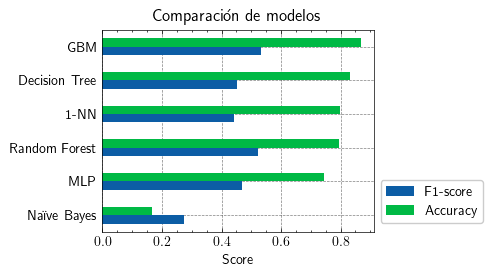

In [5]:
cu.plot_scores(resultados,['F1-score','Accuracy'], ['F1-score','Accuracy'], 'Accuracy', 'Comparación de modelos')